# Astronomy 406 "Computational Astrophysics" (Fall 2024)

# Project 1

### Background

A numerical solution to any equation always differs from an analytical solution. To obtain a reliable answer we should always check for *numerical convergence*. Usually a numerical scheme has some small step or parameter $h$. The answer is numerically converged when it no longer changes as the step $h$ is decreased. In practice, "no longer changes" means "changes by less than a user specificied accuracy $\epsilon$".

### Learning goals

* Gain experience with testing numerical convergence when calculating a derivative of a function.

* Develop a practical implementation of Richardson's method for the example of calculating a numerical derivative.

* Practice reading data from a file and creating an interpolating function.

### Task

Write your own implementation of Richardson's method for calculating a derivative. It should be a single function that takes three arguments: the name of a user-defined function, the point $x$ at which to differentiate it, and the required accuracy of the answer $\epsilon$. All the iterations and checks should be contained within the function. The user-specified accuracy can be relative $|\Delta f' / f'| < \epsilon$ or absolute $|\Delta f'| < \epsilon$, or both. The function should output the answer and internally estimated error of the answer.

# Richardson's Method

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
plt.style.use('mplstyle.txt')

In [3]:
# load in data
date, RA, Dec, RA_err, Dec_err = np.loadtxt('s2_orbit.txt', unpack=True)
RA = -RA

# create univariate spline
fs = interpolate.UnivariateSpline(RA, Dec, s=0)

# take derivative of spline at one value
de = fs.derivatives(0.05)[1]
print(de)

-1.097348731189844


In [4]:
# Definition of Richardon's method (fixed error)
def richardsons(f, x, epsilon):
    # initialize parameters
    abs_error = 999.0
    rel_error = 999.0
    f_prime_old = 999.0
    h_init = 1e-2 # starting at 1e-2 instead of 1e-1 to make interpolation cleaner
    h = h_init

    # initialize lists
    h_list = []
    f_prime_list = []
    # f_prime_extrapolated_list = []
    abs_error_list = []

    # append first terms to lists so interpolation function works even on first iteration
    h_list.append(h)
    f_prime_list.append((f(x + h) - f(x - h)) / (2.0 * h))

    # move h to next
    h *= 0.1

    count = 0
    # while absolute error is above our set threshold, continue the loop
    while abs_error > epsilon:
        
        h_list.append(h)

        # calculate numerical derivative
        f_prime = (f(x + h) - f(x - h)) / (2.0 * h)
        f_prime_list.append(f_prime)

        # create an interpolation of the numerical derivates
        interp = interpolate.interp1d(h_list, f_prime_list, kind='linear', fill_value='extrapolate')
        f_prime_extrapolated = interp(0.)
        # f_prime_extrapolated_list.append(f_prime_extrapolated)

        # calculate both absolute and relative errors
        abs_error = abs(f_prime_list[-1] - f_prime_list[-2])
        rel_error = abs(abs(f_prime_list[-1] - f_prime_list[-2]) / f_prime_list[-1])
        abs_error_list.append(abs_error)

        # make step size smaller
        h *= 0.1
        count += 1
    
    plt.figure(figsize=(6, 4))
    plt.scatter(h_list, (np.array(f_prime_list)), color='k', label='numerical derivatives')
    plt.plot(h_list, interp(h_list), color='skyblue', label='interpolation')
    plt.xlabel('log(h)')
    plt.ylabel('df/dx')
    plt.title('Derivative vs. Changing Step Size (h)')
    plt.xscale('log')
    plt.ylim(-1.5, -1.0)
    plt.legend(frameon=True)

    plt.figure(figsize=(6, 4))
    plt.scatter(h_list[1:], abs_error_list, color='k', label='Error')
    plt.xlabel('log(h)')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs. Changing Step Size (h)')
    plt.xscale('log')
    plt.yscale('log')

    # print('Final f prime:', f_prime, 'Relative error:', rel_error, 'Absolute error:', abs_error, 'h:', h)
    print("f' from interpolate.derivatives:", de)
    print("Final f':", f_prime)
    print('Relative error:', rel_error)
    print('Absolute error:', abs_error)
    print('h:', h)

f' from interpolate.derivatives: -1.097348731189844
Final f': -1.0973487314658301
Relative error: 1.9602310993132282e-09
Absolute error: 2.151057110211241e-09
h: 1.0000000000000004e-08


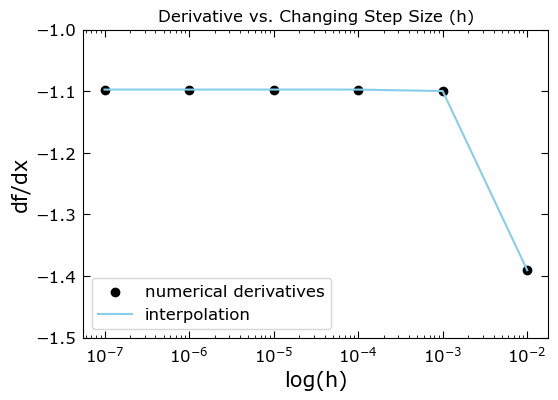

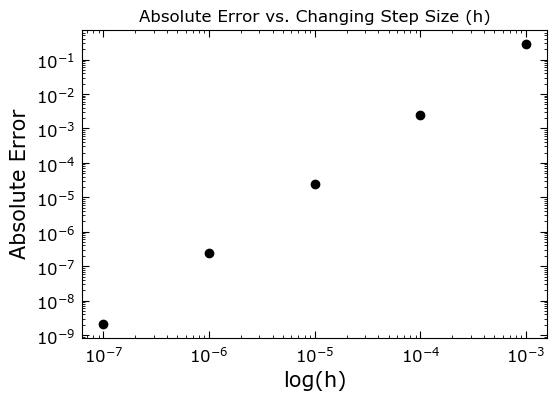

In [5]:
richardsons(fs, 0.05, 1e-8)

In [6]:
# Richardson's method function that runs until the absolute error stops decreasing
def richardsons_ver2(f, x, epsilon):
    # initialize parameters
    abs_error = 999.0
    rel_error = 999.0
    error_old = 9999.0
    f_prime_old = 999.0
    h_init = 1e-2 # starting at 1e-2 instead of 1e-1 to make interpolation cleaner
    h = h_init

    # initialize lists
    h_list = []
    f_prime_list = []
    abs_error_list = []

    # append first terms to lists so interpolation function works even on first iteration
    h_list.append(h)
    f_prime_list.append((f(x + h) - f(x - h)) / (2.0 * h))

    # move h to next
    h *= 0.1

    # countinue loop
    while abs_error < error_old:
        error_old = abs_error
        h_list.append(h)

        # calculate numerical derivative
        f_prime = (f(x + h) - f(x - h)) / (2.0 * h)
        f_prime_list.append(f_prime)

        # create an interpolation of the numerical derivates
        interp = interpolate.interp1d(h_list, f_prime_list, kind='linear', fill_value='extrapolate')
        f_prime_extrapolated = interp(0.)

        # calculate both absolute and relative errors
        abs_error = abs(f_prime_list[-1] - f_prime_list[-2])
        rel_error = abs(abs(f_prime_list[-1] - f_prime_list[-2]) / f_prime_list[-1])
        abs_error_list.append(abs_error)

        # make step size smaller
        h *= 0.1
    
    plt.figure(figsize=(6, 4))
    plt.scatter(h_list, (np.array(f_prime_list)), color='k', label='numerical derivatives')
    plt.plot(h_list, interp(h_list), color='skyblue', label='interpolation')
    plt.xlabel('log(h)')
    plt.ylabel('df/dx')
    plt.title('Derivative vs. Changing Step Size (h)')
    plt.xscale('log')
    plt.ylim(-1.5, -1.0)
    plt.legend(frameon=True)

    plt.figure(figsize=(6, 4))
    plt.scatter(h_list[1:], abs_error_list, color='k', label='Error')
    plt.xlabel('log(h)')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs. Changing Step Size (h)')
    plt.xscale('log')
    plt.yscale('log')

    # print('Final f prime:', f_prime, 'Relative error:', rel_error, 'Absolute error:', abs_error, 'h:', h)
    print("f' from interpolate.derivatives:", de)
    print("Final f':", f_prime)
    print('Relative error:', rel_error)
    print('Absolute error:', abs_error)
    print('h:', h)

f' from interpolate.derivatives: -1.097348731189844
Final f': -1.0973487535315125
Relative error: 1.8969977998998923e-08
Absolute error: 2.0816681711721685e-08
h: 1.0000000000000006e-10


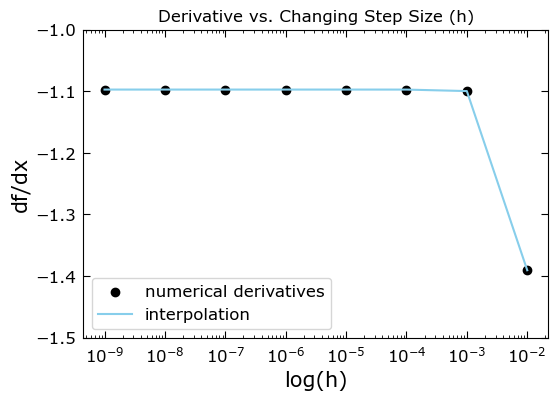

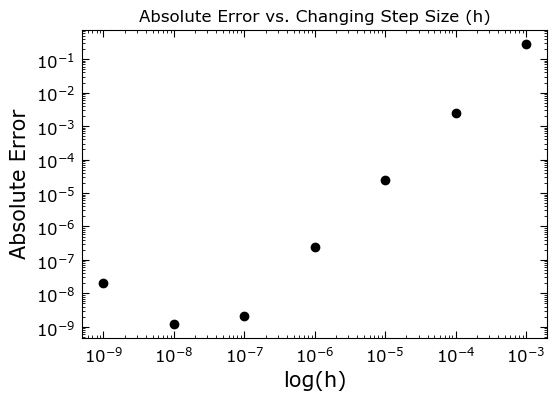

In [7]:
richardsons_ver2(fs, 0.05, 1e-8)

Looking at the error plot, we can see that the optimum value looks to be at roughly $h=10^{-8}$. At h values less than the optimal value, truncation error occurs, and the derivative gets farther and farther from the true value.

## Analysis of Results:

In this project the numerical methods I used were interpolation, and numerical derivatives. The lessons I learned from this project were how Richardson's method works, as well as what errors can be used to check when a function is accurate enough (i.e. relative vs. absolute error). It seemed that choosing either the relative and absolute errors didn't change the result by much. Another important factor was the optimal h value. Plotting the absolute error vs step size, it seemed that the optimal h value, or where the plot had it's minimum, was around $10^{-8}$. However, from my first attempt at Richardson's method, where I stopped the code when the absolute error got below our predefined epsilon value $\epsilon = 10^{-8}$ the difference between that derivative and the derivative from the package (.derivatives) was smaller than using the so called "optimal" step size. So where exactly the optimal step size seems a little unclear. If I had more time I would want to investigate this more. Finally, to improve the code, the derivative could be found by taking central differences, or forward and backward differences at many different, smaller and smaller ranges, and then combining them to reduce the error. But that will likely require more computational power/time. It does seem like while my derivatives were approaching a certain value as $h \rightarrow 0$, the value they were approaching may not have been the actual derivative (at least compared to the interpolate.derivatives value). This seems important to point out, that while Richardson's method might approach a derivative close to the true derivative, it might not be approaching close enough for the accuracy that is desired.